<a href="https://colab.research.google.com/github/MoTohamy03/Data-Analysis-and-ML-projects/blob/main/Predicting_the_Value_of_CO2_Emissionn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# you can applay this project ideas on the 2 previous projects before (data wrangling, .... )
# create nother 2 projects after understand this



# Predicting the Value of CO2 Emissionn


Now that you have been equipped with the skills over the course of 'Data Science and Analytics', now you have a chance to practice and apply it on a dataset.

### In this project, you need to build a model to predict the unknown value. ###


#### Thinking like a data scientist, you have to follow the data science methodology, as showm in the image below:




### 1- Businuess Understanding

Data science methodology begins with spending the time to seek clarification. What is the problem that you are trying to solve?

Our problem here is finding the value of the CO2 Emission.

Main Goal: Predict the value of CO2 emission based on single independent variable.

Main Object: Building a predictive model.

### 2- Analytic Approach

How can you use data to answer the question/solve the problem?

Selecting the right analytic approach to solve the problem. In this project the problem is about predicting the CO2 Emission. So we are going to use Simple Linear Regression algorithm to solve the problem.


### 3- Data Requirements

Necessary data content, Data Formats, Sources for initial data collection.

In thin project we need to collect data about the CO2 emission, engine size, and Fuel consumption.

### 4- Data Collection

After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need.



### 5- Data Understanding

Data understanding encompasses all activities related to constructing the data set.

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-07-06 19:52:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.08s   

2024-07-06 19:52:38 (843 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



### **Read the data and understand it**

In [ ]:
# we want to read the data sheet so we want to read it by pandas library
import pandas as pd

In [ ]:
data = pd.read_csv("FuelConsumption.csv")
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [ ]:
data.head(30)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
data.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [ ]:
data['MAKE'].value_counts()

MAKE
FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: count, dtype: int64

In [ ]:
# now we understand the data and no missing value on it.
# null value represented by NAN

### **6- Data Preparation**

In [ ]:
# our next step is data preparation
# at this step we will work on correlation for CO2EMISSIONS
# Notes that correlation for numerical columns only.

In [ ]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
# data.corr() # error because there is a categorical columns

In [ ]:
numerical_columns = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']

In [ ]:
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
correlation_matrix

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [ ]:
numerical_data

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271
1063,2014,3.2,6,13.2,9.5,11.5,25,264
1064,2014,3.0,6,13.4,9.8,11.8,24,271
1065,2014,3.2,6,12.9,9.3,11.3,25,260


In [ ]:
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
# import seaborn as sns

In [ ]:
import seaborn as sns # for heatmap

<Axes: >

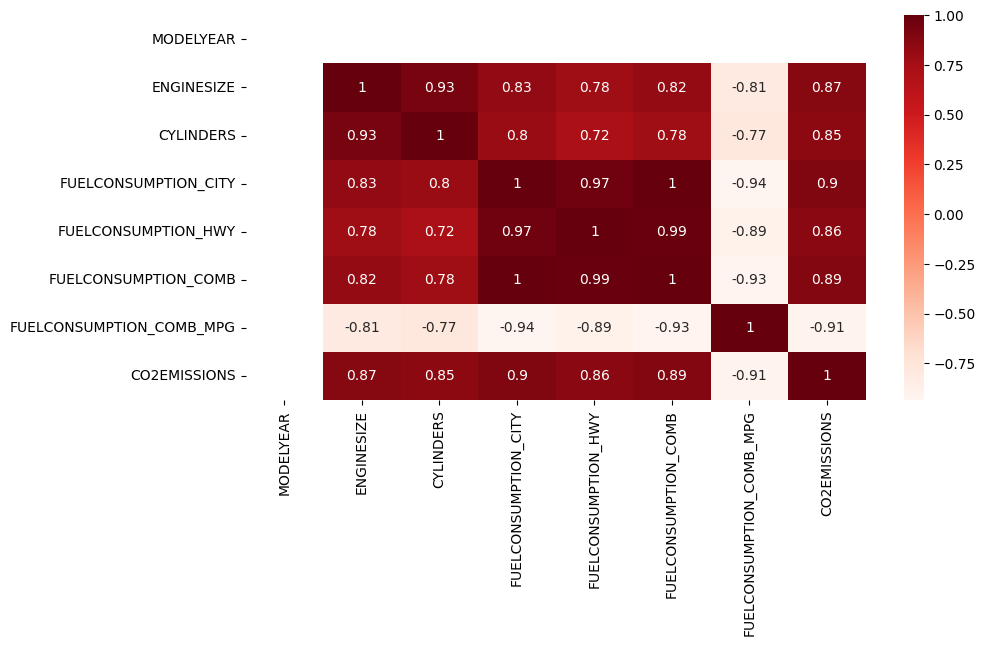

In [ ]:
plt.figure(figsize=(10,5))
# corr_data = data.corr()
sns.heatmap(numerical_data.corr() , cmap = plt.cm.Reds,annot=True) # , cmap = plt.cm.Reds # annot >> annotation default is False.
plt.show

### **EDA >> Visualization**

In [ ]:
# now we will work on EDA >> Visualization

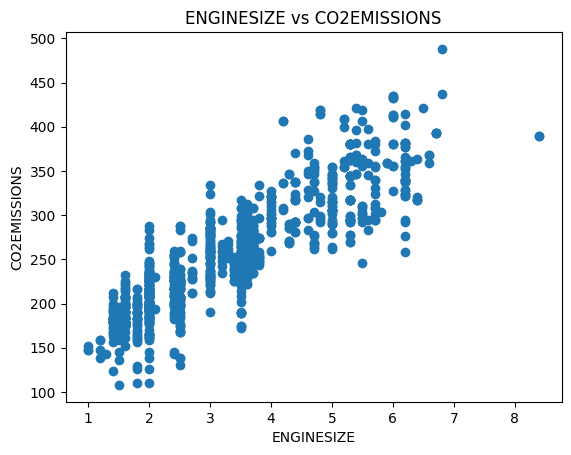

In [ ]:
plt.scatter(data['ENGINESIZE'],data['CO2EMISSIONS']) # , color = 'Blue') # color by default is whiteblue.
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('ENGINESIZE vs CO2EMISSIONS')
# correlation = 0.874154
plt.show()

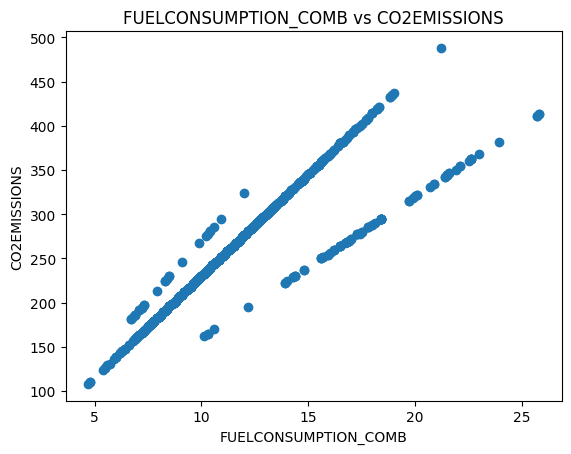

In [ ]:
plt.scatter(data.FUELCONSUMPTION_COMB,data['CO2EMISSIONS']) # , color = 'Blue') # color by default is whiteblue.
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.title('FUELCONSUMPTION_COMB vs CO2EMISSIONS')
# correlation = 0.892129
plt.show()

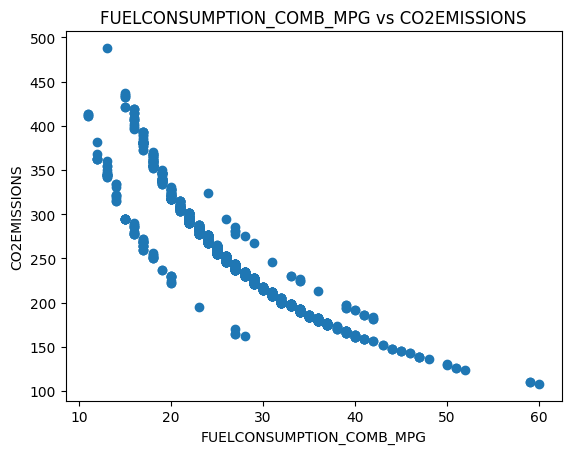

In [ ]:
plt.scatter(data.FUELCONSUMPTION_COMB_MPG, data['CO2EMISSIONS'])
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')
plt.title('FUELCONSUMPTION_COMB_MPG vs CO2EMISSIONS')
# correlation = -0.906394
plt.show()

In [ ]:
# previous visualization is negative correlation and non-linear regression.

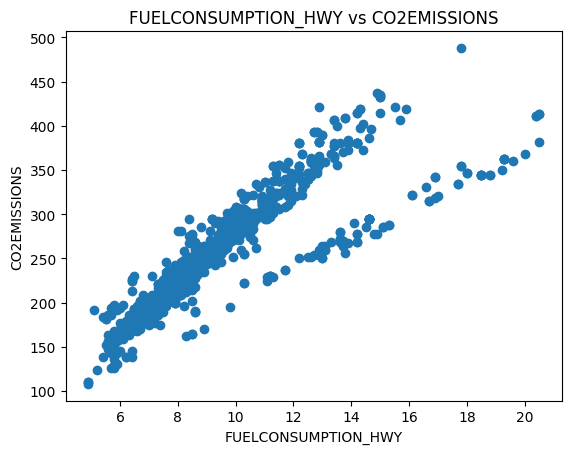

In [ ]:
plt.scatter(data.FUELCONSUMPTION_HWY, data['CO2EMISSIONS'])
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2EMISSIONS')
plt.title('FUELCONSUMPTION_HWY vs CO2EMISSIONS')

plt.show()

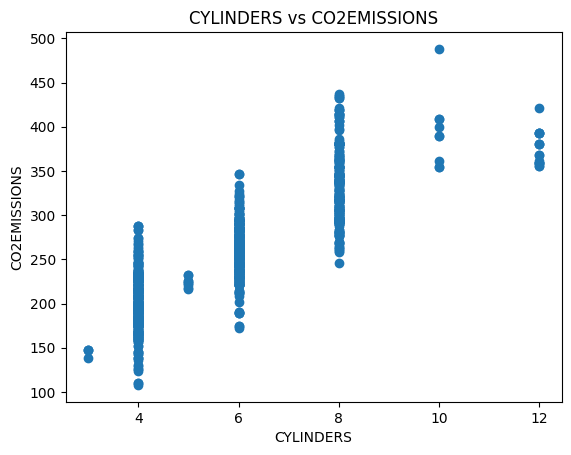

In [ ]:
plt.scatter(data.CYLINDERS, data['CO2EMISSIONS'])
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.title('CYLINDERS vs CO2EMISSIONS')
# correlation = 0.849685
plt.show()

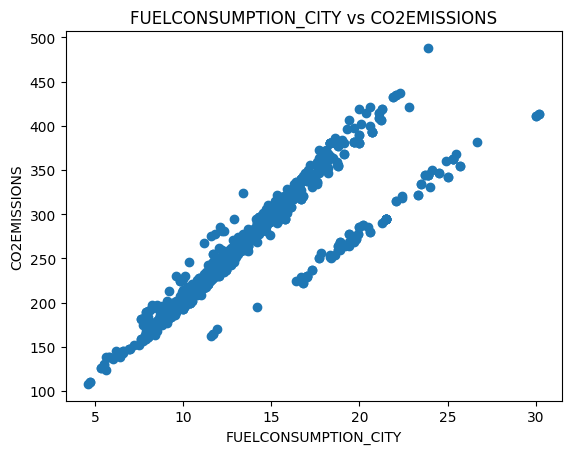

In [ ]:
plt.scatter(data.FUELCONSUMPTION_CITY, data['CO2EMISSIONS'])
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.title('FUELCONSUMPTION_CITY vs CO2EMISSIONS')
# correlation = 0.898039
plt.show()

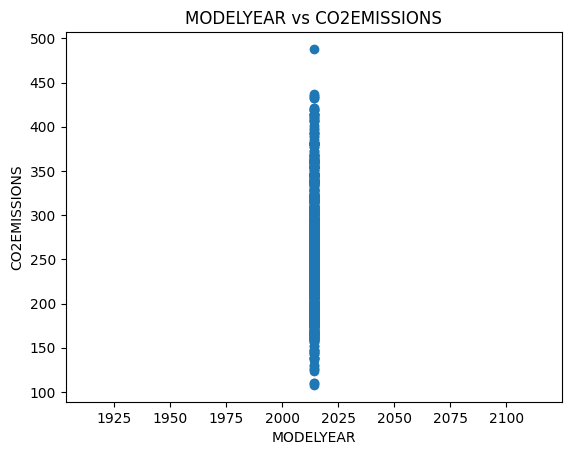

In [ ]:
plt.scatter(data.MODELYEAR, data['CO2EMISSIONS'])
plt.xlabel('MODELYEAR')
plt.ylabel('CO2EMISSIONS')
plt.title('MODELYEAR vs CO2EMISSIONS')

plt.show()

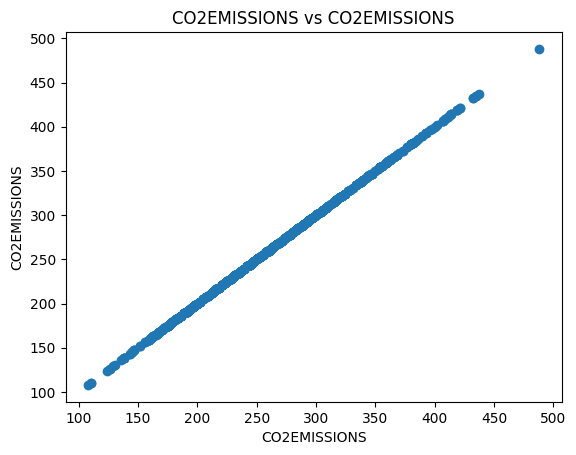

In [ ]:
plt.scatter(data.CO2EMISSIONS, data['CO2EMISSIONS'])
plt.xlabel('CO2EMISSIONS')
plt.ylabel('CO2EMISSIONS')
plt.title('CO2EMISSIONS vs CO2EMISSIONS')

plt.show()

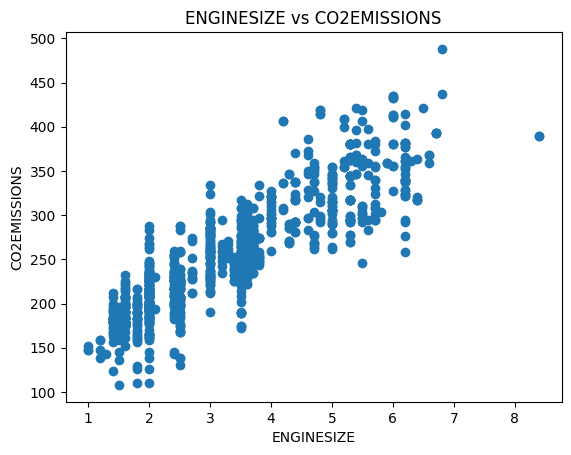

In [ ]:
plt.scatter(data['ENGINESIZE'],data['CO2EMISSIONS']) # , color = 'Blue') # color by default is whiteblue.
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('ENGINESIZE vs CO2EMISSIONS')
# correlation = 0.874154
plt.show()

### **train and test the dataset**

In [ ]:
# we will work on simple linear regression so we will use one independent variable

#### **Creating train and test dataset**

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [ ]:
import numpy as np

In [ ]:
msk = np.random.rand(len(data)) < 0.8

In [ ]:
train = data[msk]
test = data[~msk]

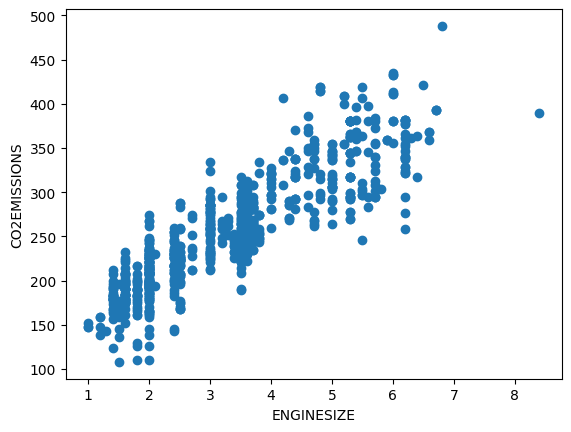

In [ ]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

plt.show()

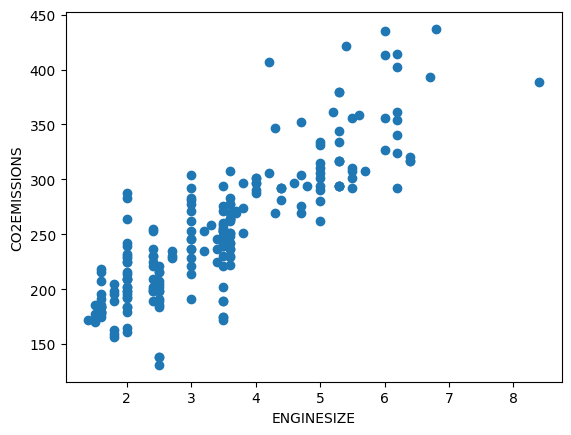

In [ ]:
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

plt.show()

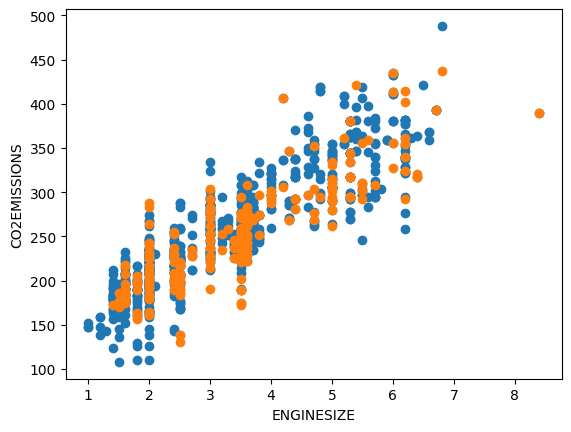

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS)

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

plt.show()

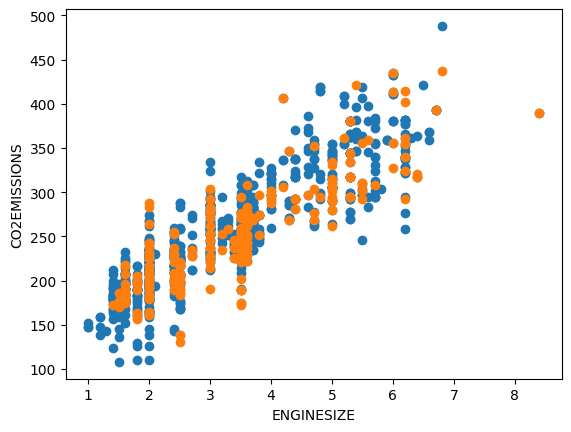

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS)

plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

plt.show()

In [ ]:
train

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,2014,VOLVO,XC60,SUV - SMALL,3.2,6,AS6,X,13.0,8.9,11.2,25,258
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [ ]:
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [ ]:
test

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
11,2014,ACURA,TSX,COMPACT,3.5,6,AS5,Z,12.1,8.3,10.4,27,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,2014,VOLKSWAGEN,GOLF WAGON,STATION WAGON - SMALL,2.5,5,M5,X,11.2,7.3,9.4,30,216
1043,2014,VOLKSWAGEN,PASSAT,MID-SIZE,1.8,4,A6,X,9.9,6.9,8.6,33,198
1050,2014,VOLKSWAGEN,ROUTAN,MINIVAN,3.6,6,A6,X,14.2,9.5,12.1,23,278
1059,2014,VOLVO,S80,MID-SIZE,3.2,6,AS6,X,11.9,8.1,10.2,28,235


## **7 - Modeling**

In [ ]:
# in modeling we will start build (create) algorithm.

In [ ]:
from sklearn import linear_model # linear model is a linear regression.

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
# convert dataframe type to array for modeling alogorithm
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [ ]:
print(train_y.shape)
print(train_x.shape)

(845, 1)
(845, 1)


In [ ]:
regr.fit(train_x, train_y)

LinearRegression()

In [ ]:
print('Thsi is the Y_Intercept: ', regr.intercept_)
print('This is the Slope of the regression line: ', regr.coef_)


Thsi is the Y_Intercept:  [124.72545551]
This is the Slope of the regression line:  [[39.84366281]]


In [ ]:
# collect all previous on trainging model
from sklearn import linear_model

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

print ('This is the Y-Intercept: ', regr.intercept_) # theta 0
print ('This is the Slop of the regression line: ', regr.coef_) # theta 1

This is the Y-Intercept:  [124.72545551]
This is the Slop of the regression line:  [[39.84366281]]


In [ ]:
x = 2.4
y = 125.82164893 + 38.78490033 * x # regression line equation.
y

218.905409722

In [ ]:
# predection
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr.predict(test_x) # test-Y because we do prediction on y.

## **8- Evaluation**

In [ ]:
from sklearn.metrics import r2_score


print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y))) #%.2f to round 2 decimal
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 25.42
Residual sum of squares (MSE): 1134.52
R2-score: 0.70


### **Another example**

Mean Squared Error: 91775324.70
R-squared: 0.93


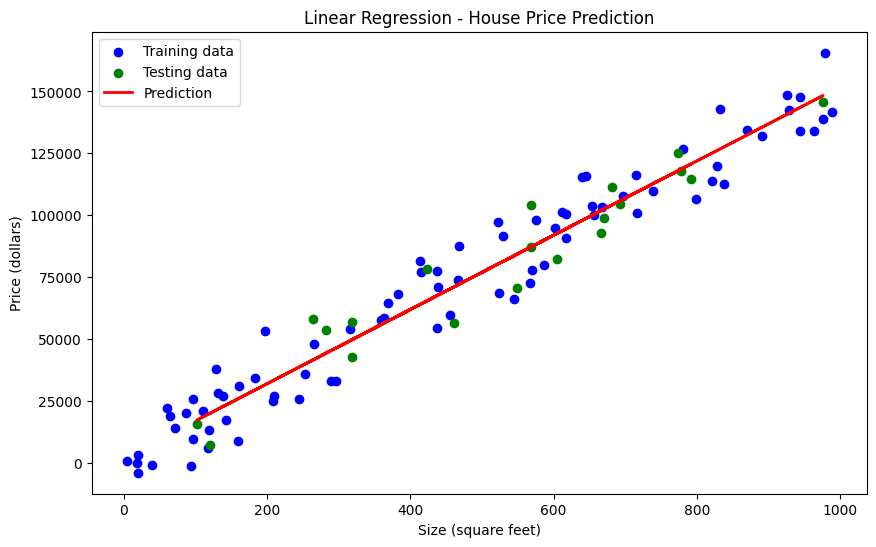

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a synthetic dataset
np.random.seed(0)
house_size = np.random.rand(100, 1) * 1000  # House sizes in square feet
house_price = house_size * 150 + np.random.randn(100, 1) * 10000  # Prices in dollars with some noise

# Create a DataFrame
data = pd.DataFrame({
    'Size': house_size.flatten(),
    'Price': house_price.flatten()
})

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Define the independent and dependent variables for training
X_train = train[['Size']]
y_train = train['Price']

# Define the independent and dependent variables for testing
X_test = test[['Size']]
y_test = test['Price']

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction')
plt.xlabel('Size (square feet)')
plt.ylabel('Price (dollars)')
plt.legend()
plt.title('Linear Regression - House Price Prediction')
plt.show()
